In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import cv2
import os
import matplotlib.pyplot as plt
import torch
from kornia.color import bgr_to_rgb
from tqdm.notebook import tqdm, trange

In [2]:
# Loading previous losses and accuracies
def testScores(directory='./Saved/'):
    acc = 0
    loss = 0
        
    try:
        with open(f'{directory}/testScore.txt', 'r') as fd:
            loss, acc = [float(testScore.rstrip()) for testScore in fd.readlines()]

    except IOError:
        print('file not Found')
    
    return {'loss': loss, 'acc': acc}

In [3]:
def valScores(directory='./Saved/'):    
    acc = []
    loss = []
    
    try:
        with open(f'{directory}/accuracies.txt', 'r') as fd:
            acc = [float(acc.rstrip()) for acc in fd.readlines()]

        with open(f'{directory}/losses.txt', 'r') as fd:
            loss = [float(losses.rstrip()) for losses in fd.readlines()]
    except IOError:
        print('file not Found')
    
    return {'loss': loss, 'acc': acc}

In [4]:
graph_path = './Graphs'
if not Path(graph_path).is_dir():
    Path.mkdir(Path(graph_path))

In [5]:
directory = './Saved/'
model_data_folders = os.listdir(directory)

In [6]:
accuracy_dict = {}
loss_dict = {}

In [7]:
model_dict = {}
for folder in model_data_folders:
    testS = testScores(directory+folder)
    
    model_dict[folder] = testS['acc']

In [8]:
model_dict

{'Unet++_Efficientnet-b6_LAB_MS-SSIM_None_Imagenet': 0.9335198341827919,
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None_Imagenet': 0.9317782614730682,
 'Unet++_Inceptionresnetv2_RGB_FM-SSIM-S4_Resnet101_Imagenet': 0.9263383590591746,
 'Unet++_Resnet101_LAB_MS-SSIM_None_Imagenet': 0.9337317482141808,
 'Unet++_Resnet101_RGB_FM-SSIM-S4_Resnet152_Imagenet': 0.9343197775006743,
 'Unet++_Resnet152_LAB_MS-SSIM_None_Imagenet': 0.9273219582726396,
 'Unet++_Resnet152_LAB_MSE-SSIM_Resnet50_Imagenet': 0.9273932647226446,
 'Unet++_Resnet152_LAB_MSE-SSIM_Vgg16_Imagenet': 0.9332746627788472,
 'Unet++_Resnet152_LAB_MSE_None_Imagenet': 0.9183737835291788,
 'Unet++_Resnet152_LAB_MSE_Resnet50_Imagenet': 0.9266138432016935,
 'Unet++_Resnet152_LAB_MSE_Vgg16_Imagenet': 0.9269545414815733,
 'Unet++_Resnet152_RGB_FM-SSIM-S4_Resnet101_Imagenet': 0.9334674660803532,
 'Unet++_Resnet152_RGB_MS-SSIM_None_Imagenet': 0.9351274715911788,
 'Unet++_Resnet18_LAB_MS-SSIM_None_Imagenet': 0.9307258178478801,
 'Unet++_Resnet18

In [9]:
model_dict = sorted(model_dict.items(), key=lambda x: x[1], reverse=True)
model_data_folders = [x[0] for x in model_dict]

In [10]:
model_data_folders

['Unet++_Resnet50_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet152_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet50_Imagenet',
 'Unet++_Resnet101_RGB_FM-SSIM-S4_Resnet152_Imagenet',
 'Unet++_Resnet34_RGB_FM-SSIM-S5_Resnet152_Imagenet',
 'Unet++_Resnet50_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet34_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet101_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet152_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S3_Resnet50_Imagenet',
 'Unet++_Resnet152_LAB_MSE-SSIM_Vgg16_Imagenet',
 'Unet++_Resnet50_LAB_MS-SSIM_None_Imagenet',
 'Unet_Resnet152_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet34_LAB_MS-SSIM_None_Imagenet',
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_LAB_MS-SSIM_None_

In [11]:
name_dict = {f'{directory}': f'KolorNet{i}' for i, directory in enumerate(model_data_folders, 1)}

In [12]:
name_dict

{'Unet++_Resnet50_RGB_FM-SSIM-S4_Resnet101_Imagenet': 'KolorNet1',
 'Unet++_Resnet152_RGB_MS-SSIM_None_Imagenet': 'KolorNet2',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet101_Imagenet': 'KolorNet3',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet50_Imagenet': 'KolorNet4',
 'Unet++_Resnet101_RGB_FM-SSIM-S4_Resnet152_Imagenet': 'KolorNet5',
 'Unet++_Resnet34_RGB_FM-SSIM-S5_Resnet152_Imagenet': 'KolorNet6',
 'Unet++_Resnet50_RGB_MS-SSIM_None_Imagenet': 'KolorNet7',
 'Unet++_Resnet34_RGB_FM-SSIM-S4_Resnet101_Imagenet': 'KolorNet8',
 'Unet++_Resnet101_LAB_MS-SSIM_None_Imagenet': 'KolorNet9',
 'Unet++_Resnet18_RGB_MS-SSIM_None_Imagenet': 'KolorNet10',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None_Imagenet': 'KolorNet11',
 'Unet++_Resnet152_RGB_FM-SSIM-S4_Resnet101_Imagenet': 'KolorNet12',
 'Unet++_Resnet18_RGB_FM-SSIM-S3_Resnet50_Imagenet': 'KolorNet13',
 'Unet++_Resnet152_LAB_MSE-SSIM_Vgg16_Imagenet': 'KolorNet14',
 'Unet++_Resnet50_LAB_MS-SSIM_None_Imagenet': 'KolorNet15',
 'Unet_Resnet152_LAB_MS-SSIM_None

In [13]:
for folder in model_data_folders:
    valScore = valScores(directory+folder)
    
    accuracy_dict[name_dict[folder]] = {
        f'{i+1}': d[0] for i, d in enumerate(zip(valScore['acc'], valScore['loss']))
    }
    
    loss_dict[name_dict[folder]] = {
        f'{i+1}': d[1] for i, d in enumerate(zip(valScore['acc'], valScore['loss']))
    }

In [14]:
accuracy_dict

{'KolorNet1': {'1': 0.9392403364,
  '2': 0.9412483685,
  '3': 0.9405351303,
  '4': 0.9419238558,
  '5': 0.9419378923,
  '6': 0.9424182263,
  '7': 0.9414661774,
  '8': 0.9402296965,
  '9': 0.9413289529,
  '10': 0.9407901563,
  '11': 0.9411101682,
  '12': 0.9408510546,
  '13': 0.9405055395,
  '14': 0.940480325,
  '15': 0.9403719687,
  '16': 0.9406884869,
  '17': 0.9403257692,
  '18': 0.9401473204},
 'KolorNet2': {'1': 0.9390602708,
  '2': 0.936909318,
  '3': 0.9399296641,
  '4': 0.9411864281,
  '5': 0.9417974353,
  '6': 0.9417725801,
  '7': 0.9417710304,
  '8': 0.9399300218,
  '9': 0.9413248897,
  '10': 0.9407401085,
  '11': 0.94090873,
  '12': 0.9409584999,
  '13': 0.9361243248,
  '14': 0.9380503893,
  '15': 0.9388347268,
  '16': 0.9402441978,
  '17': 0.9396346807,
  '18': 0.9403764606,
  '19': 0.9406764507,
  '20': 0.9403449893,
  '21': 0.9400000572,
  '22': 0.9400430918,
  '23': 0.9406681061,
  '24': 0.9401961565,
  '25': 0.9411095977,
  '26': 0.939899385,
  '27': 0.9397825599,
  '28'

In [15]:
accuracy_df = pd.DataFrame(accuracy_dict)
loss_df = pd.DataFrame(loss_dict)

In [16]:
accuracy_df.head()

,KolorNet1,KolorNet2,KolorNet3,KolorNet4,KolorNet5,KolorNet6,KolorNet7,KolorNet8,KolorNet9,KolorNet10,...,KolorNet17,KolorNet18,KolorNet19,KolorNet20,KolorNet21,KolorNet22,KolorNet23,KolorNet24,KolorNet25,KolorNet26
1,0.939240,0.939060,0.935266,0.935260,0.935340,0.932450,0.928936,0.934749,0.778421,0.927224,...,0.784369,0.749436,0.730775,0.946802,0.767791,0.786318,0.719070,0.678338,0.922614,0.928098
2,0.941248,0.936909,0.936456,0.936452,0.937524,0.935483,0.932213,0.933894,0.792928,0.932514,...,0.794132,0.765140,0.782685,0.946568,0.769871,0.794861,0.715112,0.691338,0.929397,0.929211
3,0.940535,0.939930,0.936899,0.937517,0.938659,0.936616,0.933808,0.935365,0.797221,0.934046,...,0.797645,0.776109,0.795083,0.946492,0.768401,0.798087,0.704659,0.739383,0.931193,0.929345
4,0.941924,0.941186,0.937652,0.937946,0.938078,0.937527,0.935120,0.936135,0.782933,0.935161,...,0.796736,0.780391,0.795040,0.946789,0.769895,0.798358,0.733748,0.737558,0.932112,0.930075
5,0.941938,0.941797,0.938207,0.937430,0.938501,0.937290,0.935504,0.936555,0.795850,0.935756,...,0.801498,0.783700,0.796967,0.946613,0.769831,0.796588,0.714409,0.695461,0.933070,0.930498


In [17]:
loss_df.head()

,KolorNet1,KolorNet2,KolorNet3,KolorNet4,KolorNet5,KolorNet6,KolorNet7,KolorNet8,KolorNet9,KolorNet10,...,KolorNet17,KolorNet18,KolorNet19,KolorNet20,KolorNet21,KolorNet22,KolorNet23,KolorNet24,KolorNet25,KolorNet26
1,0.036496,0.060940,0.038780,0.039294,0.037977,0.041197,0.071064,0.039166,0.221579,0.072776,...,0.215631,0.250564,0.269225,0.166758,0.483726,0.213682,0.074250,0.453633,0.046415,0.786291
2,0.035207,0.063091,0.038039,0.038533,0.036642,0.039248,0.067787,0.039789,0.207072,0.067486,...,0.205868,0.234860,0.217315,0.167624,0.476641,0.205139,0.069681,0.443633,0.042393,0.780863
3,0.035641,0.060070,0.037764,0.037842,0.035968,0.038534,0.066192,0.038821,0.202779,0.065954,...,0.202356,0.223891,0.204917,0.167382,0.479181,0.201914,0.079220,0.436923,0.041294,0.775834
4,0.034797,0.058814,0.037307,0.037601,0.036269,0.037960,0.064880,0.038308,0.217067,0.064839,...,0.203264,0.219609,0.204959,0.167928,0.474432,0.201642,0.066591,0.447593,0.040697,0.769312
5,0.034799,0.058203,0.036997,0.037849,0.036015,0.038078,0.064496,0.038044,0.204150,0.064244,...,0.198502,0.216300,0.203033,0.168608,0.472636,0.203412,0.075109,0.478563,0.040076,0.766291


In [18]:
fontSize = 18

In [ ]:
# for i in range(3):
#     fig = plt.figure()
#     loss_figs = loss_df.iloc[:, i*6:(i+1)*6].plot(figsize=(18, 10), subplots=True, layout=(3,2), fontsize=13, grid=True, legend = False)
#     [ax.set_title(model_data_folders[i*6:(i+1)*6][j], fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_ylabel('Loss', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_xlabel('Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     plt.tight_layout()
#     plt.savefig(f'{graph_path}/Loss_Plot_{i+1}.jpg')

In [ ]:
fig = plt.figure()
loss_figs = loss_df.plot(figsize=(18, 12), subplots=True, layout=(4,3), fontsize=13, grid=True, legend = False)
[ax.set_title(name_dict[model_data_folders[i]], fontdict={'fontsize':fontSize}) for i, ax in enumerate(plt.gcf().axes)]
[ax.set_ylabel('Validation Loss', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
[ax.set_xlabel('Training Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
plt.tight_layout()
plt.savefig(f'{graph_path}/Loss_Plot_All.jpg')

In [ ]:
# for i in range(3):
#     fig = plt.figure()
#     acc_figs = accuracy_df.iloc[:, i*6:(i+1)*6].plot(figsize=(18, 10), subplots=True, layout=(3,2), fontsize=13, grid=True, legend = False)
#     [ax.set_title(model_data_folders[i*6:(i+1)*6][j], fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_ylabel('Accuracy', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     [ax.set_xlabel('Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
#     plt.tight_layout()
#     plt.savefig(f'{graph_path}/Accuracy_Plot_{i+1}.jpg')


In [ ]:
fig = plt.figure()
acc_figs = accuracy_df.plot(figsize=(18, 30), subplots=True, layout=(9,3), fontsize=13, grid=True, legend=False, xlim = (0, 35))

[ax.set_title(name_dict[model_data_folders[i]], fontdict={'fontsize':fontSize}) for i, ax in enumerate(plt.gcf().axes) if i < len(model_data_folders)]
[ax.set_ylabel('Validation Accuracy', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
[ax.set_xlabel('Training Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]

plt.tight_layout()
plt.savefig(f'{graph_path}/Accuracy_Plot_All.jpg')

In [ ]:
fig = plt.figure()
acc_figs = loss_df.plot(figsize=(18, 30), subplots=True, layout=(9,3), fontsize=13, grid=True, legend=False, xlim = (0, 35))

[ax.set_title(name_dict[model_data_folders[i]], fontdict={'fontsize':fontSize}) for i, ax in enumerate(plt.gcf().axes) if i < len(model_data_folders)]
[ax.set_ylabel('Validation Loss', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]
[ax.set_xlabel('Training Epoch', fontdict={'fontsize':fontSize}) for j, ax in enumerate(plt.gcf().axes)]

plt.tight_layout()
plt.savefig(f'{graph_path}/Loss_Plot_All.jpg')

In [35]:
test_loss = []
test_accuracy = []

In [36]:
for folder in model_data_folders:
    testScore = testScores(directory+folder)
    
    test_loss.append(testScore['loss'])
    test_accuracy.append(testScore['acc'])

In [37]:
test_df = pd.DataFrame({
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
}, index = [name_dict[md] for md in model_data_folders]).sort_values('Test Accuracy', ascending=True)

In [38]:
test_df

,Test Loss,Test Accuracy
KolorNet26,1.109757,0.918374
KolorNet25,0.044707,0.926338
KolorNet24,0.014614,0.926614
KolorNet23,0.001852,0.926955
KolorNet22,0.215555,0.927322
KolorNet21,0.209953,0.927393
KolorNet20,0.210124,0.930726
KolorNet19,0.204388,0.931136
KolorNet18,0.204381,0.931714
KolorNet17,0.205329,0.931778


<Figure size 432x288 with 0 Axes>

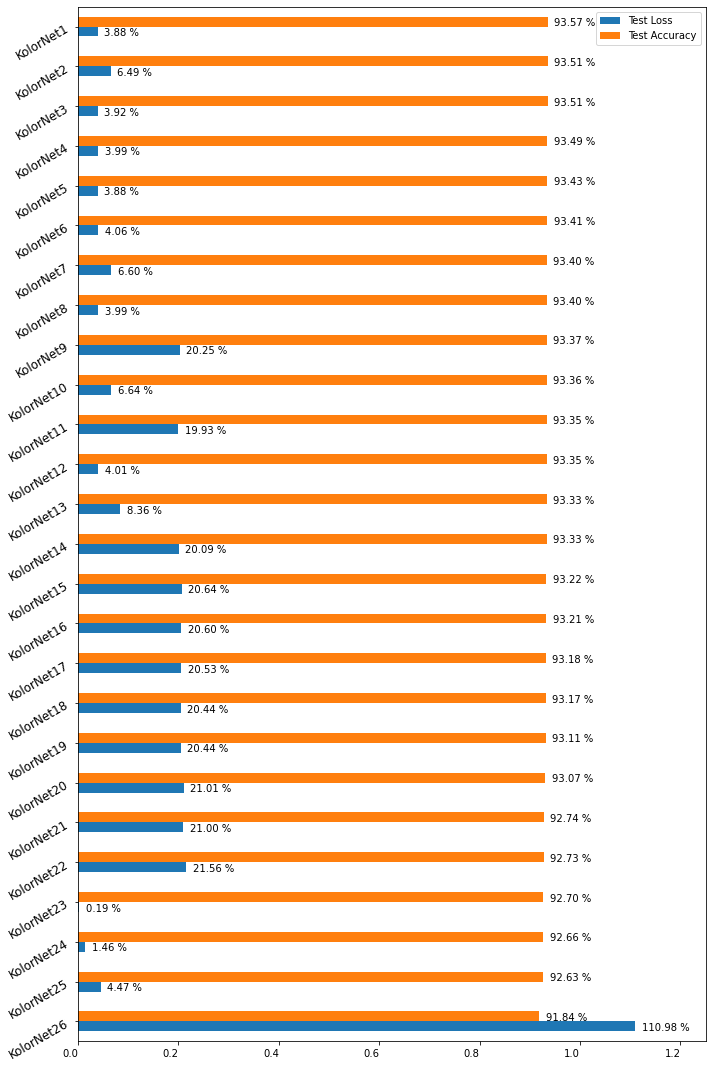

In [53]:
fig = plt.figure()
ax = test_df.plot.barh(figsize=(10, 15), rot=30, fontsize=12, xlim = (0, 1.25))

x_offset = 0.013
y_offset = -0.225

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f} %".format(b.x1*100)        
    ax.annotate(val, (b.x1+x_offset, b.y1 + y_offset))
    
plt.xticks(
    horizontalalignment='right',
#     fontweight='light',
    fontsize='medium',
)
plt.tight_layout()
plt.legend(loc=1)
plt.savefig(f'{graph_path}/Test_Result_for_All.jpg')

In [ ]:
l = [k for i, k in enumerate(ax.patches) if i%2!=1]
l

In [ ]:
def getSampleGraph(directory, filename=None):
    if filename == None:
        filename = 'SampleOutputs'
    img = cv2.imread(f'{directory}/{filename}.jpg')
    img = torch.from_numpy(img).permute(2,0,1)
    img = bgr_to_rgb(img) / 255
    return img

In [ ]:
def pltSubpot(cord, pos, cp, title, pic, titleShow = True):
    plt.subplot2grid(cord, pos, colspan=cp)
    plt.axis('off')
    if titleShow:
        plt.title(title, fontdict = {'fontsize': 20})    
    plt.imshow(pic, cmap = plt.cm.gray)

In [42]:
def specFromName(name):
    spec = name.split('_')
    return [spec[0], spec[1], spec[2], spec[3], spec[4]]

In [ ]:
# fig = plt.subplots(28, 6, figsize=(70, 280), dpi=45)
# graph_dim = (28, 6)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Input Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center')
# plt.axis('off')

# for i in range(5):
#     inputImg = getSampleGraph(f'./ModernTest', filename = f'G{i+1}')
#     pltSubpot(graph_dim, (0, i+1), 1, '', inputImg.permute(1,2,0), titleShow=False)

# plt.subplot2grid(graph_dim, (1, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          str('Target Images'), 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center')
# plt.axis('off')

# for i in range(5):
#     targetImg = getSampleGraph(f'./TargetSample', filename = f'T{i+1}')
#     pltSubpot(graph_dim, (1, i+1), 1, '', targetImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders)):
#     idx = f+2
#     folder = model_data_folders[f]
    
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center')
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'ModernImg-{i+1}')
#         pltSubpot(graph_dim, (idx, i+1), 1, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout()
# plt.savefig(f'{graph_path}/all.jpg')
# # plt.close(fig)

In [ ]:
# ?plt.text

In [30]:
model_data_folders

['Unet++_Resnet50_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet152_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S4_Resnet50_Imagenet',
 'Unet++_Resnet101_RGB_FM-SSIM-S4_Resnet152_Imagenet',
 'Unet++_Resnet34_RGB_FM-SSIM-S5_Resnet152_Imagenet',
 'Unet++_Resnet50_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet34_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet101_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_RGB_MS-SSIM_None_Imagenet',
 'Unet++_Efficientnet-b6_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet152_RGB_FM-SSIM-S4_Resnet101_Imagenet',
 'Unet++_Resnet18_RGB_FM-SSIM-S3_Resnet50_Imagenet',
 'Unet++_Resnet152_LAB_MSE-SSIM_Vgg16_Imagenet',
 'Unet++_Resnet50_LAB_MS-SSIM_None_Imagenet',
 'Unet_Resnet152_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet34_LAB_MS-SSIM_None_Imagenet',
 'Unet_Inceptionresnetv2_LAB_MS-SSIM_None_Imagenet',
 'Unet++_Resnet18_LAB_MS-SSIM_None_

In [43]:
models_table = {}
model_name_list = []
arch_List = []
encoder_List = []
colorsspace_List = []
loss_fn_List = []
embedding_List = []
epoch_list = [len(accuracy_dict[name_dict[x]]) for x in model_data_folders]

for i, md in enumerate(model_data_folders, 1):
    model_name_list.append(name_dict[md])
    
    arch, encoder, colorsspace, loss_fn, embedding = specFromName(md)
    arch_List.append(arch)
    encoder_List.append(encoder)
    colorsspace_List.append(colorsspace)
    loss_fn_List.append(loss_fn)
    embedding_List.append(embedding)

models_table['Architecture'] = arch_List
models_table['Encoder'] = encoder_List
models_table['ColorSpace'] = colorsspace_List
models_table['Loss_Function'] = loss_fn_List
models_table['Embedding'] = embedding_List
models_table['Test_Accuracy'] = [f'{ta*100:.2f}%' for ta in test_accuracy]
models_table['Test_Loss'] = [f'{tl*100:.2f}%' for tl in test_loss]
models_table['Epochs_Trained'] = epoch_list

In [44]:
models_table_df = pd.DataFrame(models_table, index = model_name_list)

In [45]:
models_table_df

,Architecture,Encoder,ColorSpace,Loss_Function,Embedding,Test_Accuracy,Test_Loss,Epochs_Trained
KolorNet1,Unet++,Resnet50,RGB,FM-SSIM-S4,Resnet101,93.57%,3.88%,18
KolorNet2,Unet++,Resnet152,RGB,MS-SSIM,None,93.51%,6.49%,38
KolorNet3,Unet++,Resnet18,RGB,FM-SSIM-S4,Resnet101,93.51%,3.92%,8
KolorNet4,Unet++,Resnet18,RGB,FM-SSIM-S4,Resnet50,93.49%,3.99%,9
KolorNet5,Unet++,Resnet101,RGB,FM-SSIM-S4,Resnet152,93.43%,3.88%,8
KolorNet6,Unet++,Resnet34,RGB,FM-SSIM-S5,Resnet152,93.41%,4.06%,14
KolorNet7,Unet++,Resnet50,RGB,MS-SSIM,None,93.40%,6.60%,12
KolorNet8,Unet++,Resnet34,RGB,FM-SSIM-S4,Resnet101,93.40%,3.99%,21
KolorNet9,Unet++,Resnet101,LAB,MS-SSIM,None,93.37%,20.25%,23
KolorNet10,Unet++,Resnet18,RGB,MS-SSIM,None,93.36%,6.64%,10


<Figure size 432x288 with 0 Axes>

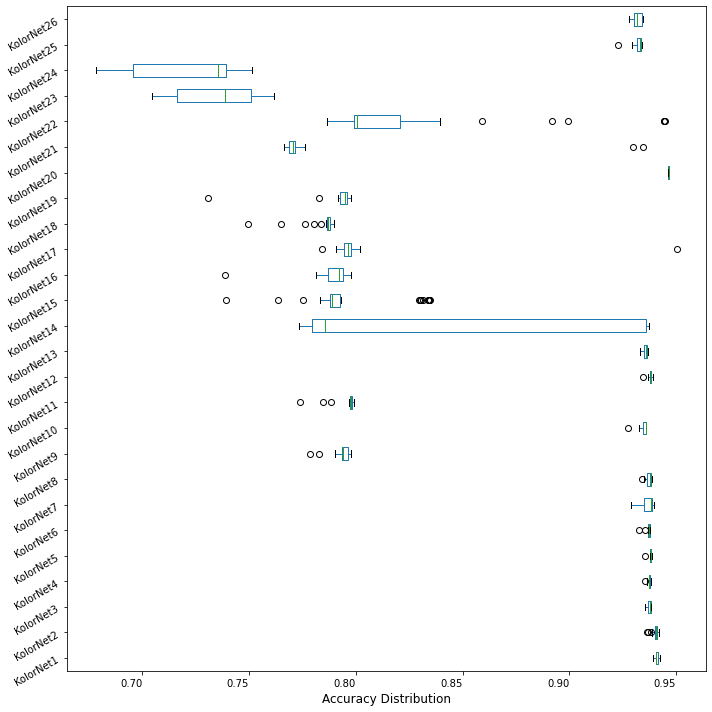

In [46]:
fig = plt.figure()
accuracy_df.plot.box(vert=False, figsize=(10, 10), rot=30)
plt.xticks(
    horizontalalignment='right',
    fontsize='medium',
)
plt.xlabel('Accuracy Distribution', fontsize='large',)
plt.tight_layout()
plt.savefig(f'{graph_path}/Accuracy_Distribution.jpg')

<Figure size 432x288 with 0 Axes>

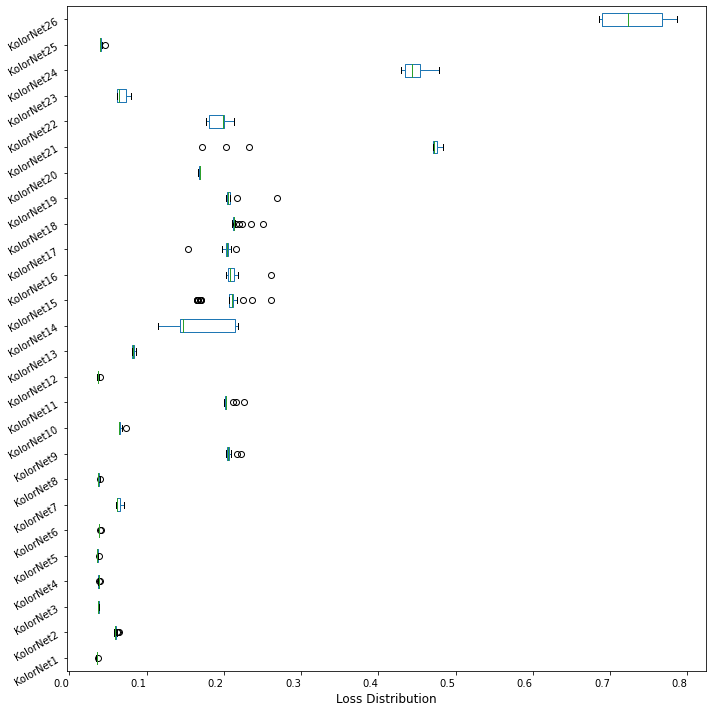

In [47]:
fig = plt.figure()
loss_df.plot.box(vert=False, figsize=(10, 10), rot=30)
plt.xticks(
    horizontalalignment='right',
    fontsize='medium',
)
plt.xlabel('Loss Distribution', fontsize='large',)
plt.tight_layout()
plt.savefig(f'{graph_path}/Loss_Distribution.jpg')

In [48]:
testDir = './RealTest/'
testImg = os.listdir(testDir)
img_dim = 256

FileNotFoundError: [WinError 3] The system cannot find the path specified: './RealTest/'

In [ ]:
testImgs = []
for ti in testImg:
    timg = cv2.imread(f'{testDir}{ti}')
    timg = cv2.resize(timg, (img_dim, img_dim))
    timg = torch.from_numpy(timg).permute(2,0,1)
    testImgs.append(timg[0].unsqueeze(0))

In [ ]:
testImgs = torch.stack(tuple(testImgs))

In [ ]:
testImgs.shape

In [ ]:
# fig = plt.subplots(1, 5, figsize=(50, 10), dpi=45)
# graph_dim = (1, 5)

# for i, ti in enumerate(testImgs):
#     pltSubpot(graph_dim, (0, i), 1, '', ti.permute(1,2,0), titleShow=False)

In [ ]:
pd.DataFrame(models_table_df.Test_Accuracy)

In [ ]:
# loss_df

In [ ]:
# fig, axes= plt.subplots(27, 16, figsize=(50, 275), dpi=45)
# graph_dim = (27, 16)


# # for ax in axes[0:,0]:
# #     ax.set_ylabel('fdg', rotation=90, size=70)

# plt.subplot2grid(graph_dim, (0, 0), colspan=1)
# plt.text(0.1, 0.5, 
#          'Input Image', 
#          dict(size=70),
#          horizontalalignment='left',
#          verticalalignment='center',
#          rotation=90)
# plt.axis('off')
    
# for i in range(5):
#     inputImg = getSampleGraph(f'./LagecyTest', filename = f'L{i+1}')
#     pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)
    
# for f in trange(len(model_data_folders)):
#     idx = f+1
#     folder = model_data_folders[f]
#     plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
#     plt.text(0.1, 0.5, 
#              str(name_dict[folder]), 
#              dict(size=70),
#              horizontalalignment='left',
#              verticalalignment='center',
#              rotation=90)
#     plt.axis('off')
    
#     for i in range(5):
#         sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'LagecyImg-{i+1}')
#         pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
# plt.tight_layout(pad=0.0, h_pad=0.0)
# plt.savefig(f'{graph_path}/Real_All.jpg')
# # plt.close(fig)

In [ ]:
hp = 13

fig = plt.subplots(hp+2, 16, figsize=(50, 150), dpi=45)
graph_dim = (hp+2, 16)

plt.subplot2grid(graph_dim, (0, 0), colspan=1)
plt.text(0.1, 0.5, 
         str('Input Images'), 
         dict(size=70),
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90)
plt.axis('off')

for i in range(5):
    inputImg = getSampleGraph(f'./ModernTest', filename = f'G{i+1}')
    pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)

plt.subplot2grid(graph_dim, (1, 0), colspan=1)
plt.text(0.1, 0.5, 
         str('Target Images'), 
         dict(size=70),
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90)
plt.axis('off')

for i in range(5):
    targetImg = getSampleGraph(f'./TargetSample', filename = f'T{i+1}')
    pltSubpot(graph_dim, (1, (3*i)+1), 3, '', targetImg.permute(1,2,0), titleShow=False)
    
for f in trange(len(model_data_folders[:hp])):
    idx = f+2
    folder = model_data_folders[f]
#     folder = model_data_folders[f+hp]
    
    plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
    plt.text(0.1, 0.5, 
             str(name_dict[folder]), 
             dict(size=70),
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90)
    plt.axis('off')
    
    for i in range(5):
        sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'ModernImg-{i+1}')
        pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
plt.tight_layout(pad=0.0, h_pad=0.0)
plt.savefig(f'{graph_path}/Modurn_1st.jpg')
# plt.close()

In [ ]:
hp = 13

fig = plt.subplots(hp+1, 16, figsize=(50, 140), dpi=45)
graph_dim = (hp+1, 16)

plt.subplot2grid(graph_dim, (0, 0), colspan=1)
plt.text(0.1, 0.5, 
         str('Input Images'), 
         dict(size=70),
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90)
plt.axis('off')

for i in range(5):
    inputImg = getSampleGraph(f'./LagecyTest', filename = f'L{i+1}')
    pltSubpot(graph_dim, (0, (3*i)+1), 3, '', inputImg.permute(1,2,0), titleShow=False)
    
for f in trange(len(model_data_folders[hp:])):
    idx = f+1
    folder = model_data_folders[f+hp]
#     folder = model_data_folders[f]
    
    plt.subplot2grid(graph_dim, (idx, 0), colspan=1)
    plt.text(0.1, 0.5, 
             str(name_dict[folder]), 
             dict(size=70),
             horizontalalignment='left',
             verticalalignment='center',
             rotation=90)
    plt.axis('off')
    
    for i in range(5):
        sampleImg = getSampleGraph(f'{directory+folder}/Results', filename = f'LagecyImg-{i+1}')
        pltSubpot(graph_dim, (idx, (3*i)+1), 3, '', sampleImg.permute(1,2,0), titleShow=False)
        
plt.tight_layout(pad=0.0, h_pad=0.0)
plt.savefig(f'{graph_path}/Lagecy_2nd.jpg')
# plt.close()

In [19]:
def getTotalParam(model):
    arch = model.split('_')[0].lower()
    encoder = model.split('_')[1].lower()
    
    if arch == 'unet++':
        if 'resnet18' in encoder:
            return f'{15964322/1000000:0.2f} M'
        elif 'resnet34' in encoder:
            return f'{26072482/1000000:0.2f} M'
        elif 'resnet50' in encoder:
            return f'{48979618/1000000:0.2f} M'
        elif 'resnet101' in encoder:
            return f'{67971746/1000000:0.2f} M'
        elif 'resnet152' in encoder:
            return f'{83615394/1000000:0.2f} M'
        elif 'efficientnet' in encoder:
            return f'{43332554/1000000:0.2f} M'
        elif 'inceptionresnetv2' in encoder:
            return f'{71082562/1000000:0.2f} M'
        else:
            return "NaN"
    else:
        if 'inceptionresnetv2' in encoder:
            return f'{62028866/1000000:0.2f} M'
        elif 'resnet152' in encoder:
            return f'{67150754/1000000:0.2f} M'
        else:
            return "NaN"

In [20]:
# model_param_dict = {'Unet++_Resnet152_LAB_MS-SSIM_None': 83615394,
#  'Unet++_Resnet50_LAB_MS-SSIM_None': 48979618,
#  'Unet++_Resnet152_RGB_MS-SSIM_None': 83615394,
#  'Unet++_Resnet34_LAB_MS-SSIM_None': 26072482,
#  'Unet++_Inceptionresnetv2_LAB_MS-SSIM_None': 71082562,
#  'Unet++_Resnet18_LAB_MS-SSIM_None': 15964322,
#  'Unet++_Efficientnet-b6_LAB_MS-SSIM_None': 43332554,
#  'Unet++_Resnet101_LAB_MS-SSIM_None': 67971746,
#  'Unet_Inceptionresnetv2_LAB_MS-SSIM_None': 62028866,
#  'Unet_resnet152_LAB_MS-SSIM_None': 67150754,
#  'Unet++_Resnet152_LAB_MSELoss_None': 83615394,
#  'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Resnet50': 83615394,
#  'Unet++_Resnet50_RGB_MS-SSIM_None': 48979618,
#  'Unet++_Resnet152_LAB_MSELoss+MS-SSIM_Vgg16': 83615394,
#  'Unet++_Resnet152_LAB_MSELoss_Vgg16': 83615394,
#  'Unet++_Resnet152_LAB_MSELoss_Resnet50': 83615394}

In [21]:
# model_param_dict

In [49]:
models_table['Trainable_Parameters'] = [getTotalParam(x) for x in model_data_folders]

In [50]:
models_table_df = pd.DataFrame(models_table, index = model_name_list)

In [51]:
models_table_df.to_csv('variant_table')

In [52]:
models_table_df

,Architecture,Encoder,ColorSpace,Loss_Function,Embedding,Test_Accuracy,Test_Loss,Epochs_Trained,Trainable_Parameters
KolorNet1,Unet++,Resnet50,RGB,FM-SSIM-S4,Resnet101,93.57%,3.88%,18,48.98 M
KolorNet2,Unet++,Resnet152,RGB,MS-SSIM,None,93.51%,6.49%,38,83.62 M
KolorNet3,Unet++,Resnet18,RGB,FM-SSIM-S4,Resnet101,93.51%,3.92%,8,15.96 M
KolorNet4,Unet++,Resnet18,RGB,FM-SSIM-S4,Resnet50,93.49%,3.99%,9,15.96 M
KolorNet5,Unet++,Resnet101,RGB,FM-SSIM-S4,Resnet152,93.43%,3.88%,8,67.97 M
KolorNet6,Unet++,Resnet34,RGB,FM-SSIM-S5,Resnet152,93.41%,4.06%,14,26.07 M
KolorNet7,Unet++,Resnet50,RGB,MS-SSIM,None,93.40%,6.60%,12,48.98 M
KolorNet8,Unet++,Resnet34,RGB,FM-SSIM-S4,Resnet101,93.40%,3.99%,21,26.07 M
KolorNet9,Unet++,Resnet101,LAB,MS-SSIM,None,93.37%,20.25%,23,67.97 M
KolorNet10,Unet++,Resnet18,RGB,MS-SSIM,None,93.36%,6.64%,10,15.96 M


In [1]:
dt = torchvision.datasets.CocoDetection('./root/imgnet/', split = 'val', download = True)

NameError: name 'torchvision' is not defined